In [73]:
import pandas as pd
import random

In [14]:
train = pd.read_csv('train.tsv',sep='\t')
test = pd.read_csv('test.tsv',sep='\t')
dev = pd.read_csv('dev.tsv', sep='\t')

In [3]:
train.head()

,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects
0,15661,"""The money the Clinton Foundation took from fr...","April 26, 2015","""Gingrich said the Clinton Foundation """"took m...",Katie Sanders,"""Hillary Clinton is in the political crosshair...",https://www.wsj.com/articles/clinton-foundatio...,false,"Foreign Policy, PunditFact, Newt Gingrich,"
1,9893,Annual Mammograms May Have More False-Positives,"October 18, 2011",This article reports on the results of a study...,,While the financial costs of screening mammogr...,,mixture,"Screening,WebMD,women's health"
2,11358,SBRT Offers Prostate Cancer Patients High Canc...,"September 28, 2016",This news release describes five-year outcomes...,"Mary Chris Jaklevic,Steven J. Atlas, MD, MPH,K...",The news release quotes lead researcher Robert...,https://www.healthnewsreview.org/wp-content/up...,mixture,"Association/Society news release,Cancer"
3,10166,"Study: Vaccine for Breast, Ovarian Cancer Has ...","November 8, 2011","While the story does many things well, the ove...",,"The story does discuss costs, but the framing ...",http://clinicaltrials.gov/ct2/results?term=can...,true,"Cancer,WebMD,women's health"
4,11276,Some appendicitis cases may not require ’emerg...,"September 20, 2010",We really don’t understand why only a handful ...,,"""Although the story didn’t cite the cost of ap...",,true,


In [4]:
train.describe()

,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects
count,9832,9824,7895,9824,9821,9806,9804,9805,9804
unique,9817,9824,3245,9675,1980,9589,5063,5,5811
top,"""","""The money the Clinton Foundation took from fr...","March 17, 2015",false,,Doctors in India have been successful in treat...,,true,Health News
freq,9,1,117,3,2222,12,4550,5078,1242


In [9]:
print(train[:1]['claim'][0])

"The money the Clinton Foundation took from from foreign governments while Hillary Clinton was secretary of state ""is clearly illegal. … The Constitution says you can’t take this stuff."


In [11]:
print(train[:1]['fact_checkers'][0])

Katie Sanders


In [30]:
print(train[:1]['main_text'][0])

"Hillary Clinton is in the political crosshairs as the author of a new book alleges improper financial ties between her public and personal life. At issue in conservative author Peter Schweizer’s forthcoming book Clinton Cash are donations from foreign governments to the Clinton Foundation during the four years she served as secretary of state. George Stephanopoulos used an interview with Schweizer on ABC This Week to point out what other nonpartisan journalists have found: There is no ""smoking gun"" showing that donations to the foundation influenced her foreign policy decisions. Still, former Republican House Speaker Newt Gingrich says the donations are ""clearly illegal"" under federal law. In his view, a donation by a foreign government to the Clinton Foundation while Clinton was secretary of state is the same as money sent directly to her, he said, even though she did not join the foundation’s board until she left her post. ""The Constitution of the United States says you cannot 

In [31]:
print(train[:1]['sources'][0])

https://www.wsj.com/articles/clinton-foundation-defends-acceptance-of-foreign-donations-1424302856, https://www.washingtonpost.com/politics/for-clintons-speech-income-shows-how-their-wealth-is-intertwined-with-charity/2015/04/22/12709ec0-dc8d-11e4-a500-1c5bb1d8ff6a_story.html?tid=pm_politics_pop_b, https://www.politifact.com/truth-o-meter/statements/2009/oct/29/ginny-brown-waite/does-president-need-permission-congress-accept-nob/, https://www.politifact.com/truth-o-meter/statements/2015/feb/26/american-crossroads/conservative-group-claims-hillary-clintons-foundat/, http://thefederalist.com/2015/03/02/the-u-s-constitution-actually-bans-hillarys-foreign-government-payola/, https://www.wsj.com/articles/foreign-government-gifts-to-clinton-foundation-on-the-rise-1424223031, https://www.washingtonpost.com/politics/foreign-governments-gave-millions-to-foundation-while-clinton-was-at-state-dept/2015/02/25/31937c1e-bc3f-11e4-8668-4e7ba8439ca6_story.html, https://www.politifact.com/truth-o-meter

In [32]:
print(train[:1]['explanation'][0])

"Gingrich said the Clinton Foundation ""took money from from foreign governments while (Hillary Clinton) was secretary of state. It is clearly illegal. … The Constitution says you can’t take this stuff."" A clause in the Constitution does prohibit U.S. officials such as former Secretary of State Hillary Clinton from receiving gifts, or emoluments, from foreign governments. But the gifts in this case were donations from foreign governments that went to the Clinton Foundation, not Hillary Clinton. She was not part of the foundation her husband founded while she was secretary of state. Does that violate the Constitution? Some libertarian-minded constitutional law experts say it very well could. Others are skeptical. What’s clear is there is room for ambiguity, and the donations are anything but ""clearly illegal."" The reality is this a hazy part of U.S. constitutional law. 


In [13]:
train['main_text'].describe()

count                                                  9806
unique                                                 9589
top       Doctors in India have been successful in treat...
freq                                                     12
Name: main_text, dtype: object

In [26]:
train['main_text_tokens'] = train['main_text'].apply(lambda n: len(str(n).split()))

In [27]:
train['main_text_tokens'].describe()

count    9832.000000
mean      711.883645
std       513.189822
min         1.000000
25%       377.000000
50%       607.000000
75%       914.000000
max      7067.000000
Name: main_text_tokens, dtype: float64

In [29]:
train[train["main_text_tokens"]==377]

,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects,main_text_tokens
1347,8003,"Facing shortages, India bets on China for swif...","March 31, 2020",India will buy ventilators and masks from Chin...,"Neha Dasgupta, Aditya Kalra","""India has recorded 1,251 cases of the coronav...",https://bit.ly/2Jr5Mb9,true,Health News,377
1865,9750,'Play This Video Game And Call Me In The Morning',"August 19, 2015",This story about video games being tested as t...,"Andrew Holtz, MPH,A'ndrea Elyse Messer, MS, Ph...",There is no mention of the costs of the games....,,false,"ADHD,video games",377
4463,33320,Retired CIA agent Normand Hodges confessed on ...,"April 16, 2015",World News Daily Report is a fake news site th...,David Mikkelson,"On 25 March 2015, World News Daily Report publ...","http://www.donotlink.com/epe4, http://www.dono...",false,"Media Matters, marilyn monroe, Not Necessarily...",377
5002,8504,"Iran records 4,585 coronavirus deaths as restr...","April 13, 2020",Iran’s death toll from the coronavirus outbrea...,,"On Sunday, the government lifted a ban on trav...",,true,Health News,377
5509,2361,Casual pot use causes brain abnormalities in t...,"April 16, 2014","Young, casual marijuana smokers experience pot...",Alex Dobuzinskis,The study to be published on Wednesday in the ...,,true,Health News,377
6325,5448,State Health Department calls for requiring ou...,NaN,State authorities called Thursday for a law re...,Mike Catalini,The call was included in a state Health Depart...,,true,"Health, General News, Disease outbreaks, New J...",377
8763,1659,China capital to roll out tough anti-smoking l...,"May 31, 2015","Beijing will ban smoking in restaurants, offic...",Megha Rajagopalan,Health activists have pushed for years for str...,,true,Health News,377
9263,29781,"In 2017, 2018 or 2019, the U.S. Centers for Di...","May 28, 2019",Breaking13News.com routinely produces junk new...,Dan MacGuill,"In May 2019, a nearly two-year-old hoax re-eme...",,false,Junk News,377


In [5]:
train.describe()

,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects
count,9832,9824,7895,9824,9821,9806,9804,9805,9804
unique,9817,9824,3245,9675,1980,9589,5063,5,5811
top,"""","""The money the Clinton Foundation took from fr...","March 17, 2015",false,,Doctors in India have been successful in treat...,,true,Health News
freq,9,1,117,3,2222,12,4550,5078,1242


In [6]:
train.columns[train.isna().any()].tolist()

['claim',
 'date_published',
 'explanation',
 'fact_checkers',
 'main_text',
 'sources',
 'label',
 'subjects']

In [12]:
train['claim'].isnull().sum()

0

In [18]:
train['main_text'].isnull().sum()

26

In [10]:
train = train.dropna(subset=['claim', 'main_text'])

In [15]:
train['label'].value_counts()

label
true        5078
false       3001
mixture     1434
unproven     291
snopes         1
Name: count, dtype: int64

In [16]:
test['label'].value_counts()

label
true        599
false       388
mixture     201
unproven     45
Name: count, dtype: int64

In [17]:
dev['label'].value_counts()

label
true                                             629
false                                            380
mixture                                          164
unproven                                          41
National, Candidate Biography, Donald Trump,       1
Name: count, dtype: int64

In [19]:
def get_stats(train, columns):

    for column in columns:
        train[f'{column}_tokens'] = train[column].apply(lambda n: len(str(n).split()))
        print(train[f'{column}_tokens'].describe())


get_stats(train, columns=['claim', 'main_text', 'explanation'])

count    9832.000000
mean       13.935720
std        15.676614
min         1.000000
25%         8.000000
50%        11.000000
75%        17.000000
max       779.000000
Name: claim_tokens, dtype: float64
count    9832.000000
mean      711.883645
std       513.189822
min         1.000000
25%       377.000000
50%       607.000000
75%       914.000000
max      7067.000000
Name: main_text_tokens, dtype: float64
count    9832.000000
mean       77.910293
std        89.821493
min         0.000000
25%        25.000000
50%        38.000000
75%        92.000000
max       671.000000
Name: explanation_tokens, dtype: float64


In [131]:
def get_mtc(row):
    claim_tokens = row['claim_tokens']
    evidence_tokens = row['main_text_tokens']

    return (claim_tokens + evidence_tokens + 100 + random.randint(30,70)*random.randint(2, 10))/1000

In [133]:
train['mtc_3'] = train.apply(get_mtc, axis=1)

In [123]:
def get_mtc_just(row):
    claim_tokens = row['claim_tokens']
    evidence_tokens = row['main_text_tokens']
    explanation_tokens = row['explanation_tokens']

    return (claim_tokens + evidence_tokens + explanation_tokens*10+random.randint(200,400)*random.randint(2, 5))/1000

In [124]:
train['mtc_3_just'] = train.apply(get_mtc_just, axis=1)

Text(0.5, 1.0, ' JUST-VERDICT: Histogram of \n Response Times per Claim')

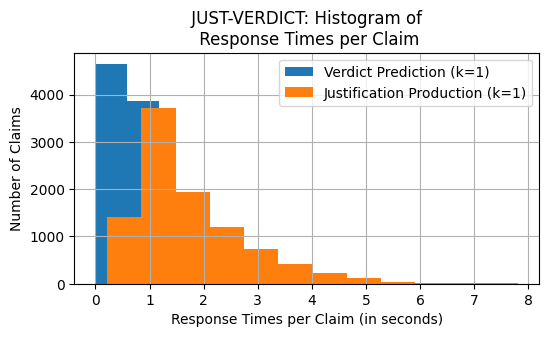

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3))
plt.hist(train['mtc'], bins=12, label='Verdict Prediction (k=1)')
plt.hist(train['mtc_just'], bins=12, label='Justification Production (k=1)')
plt.xlabel('Response Times per Claim (in seconds)')
plt.ylabel('Number of Claims')
plt.grid(True)
plt.legend()

plt.title(' JUST-VERDICT: Histogram of \n Response Times per Claim')

Text(0.5, 1.0, 'JUST-VERDICT: Histogram of \n Response Times per Claim')

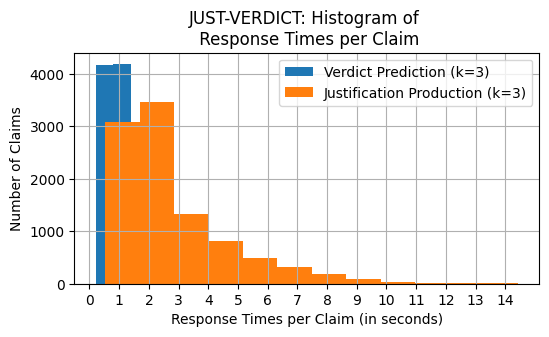

In [138]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3))
plt.hist(train['mtc_base'], bins=12, label='Verdict Prediction (k=3)')
plt.hist(train['mtc_base_just'], bins=12, label='Justification Production (k=3)')
plt.xlabel('Response Times per Claim (in seconds)')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
plt.ylabel('Number of Claims')
plt.grid(True)
plt.legend()

plt.title('JUST-VERDICT: Histogram of \n Response Times per Claim')

Text(0.5, 1.0, ' PUBHEALTH Baseline: Histogram of \n Response Times per Claim')

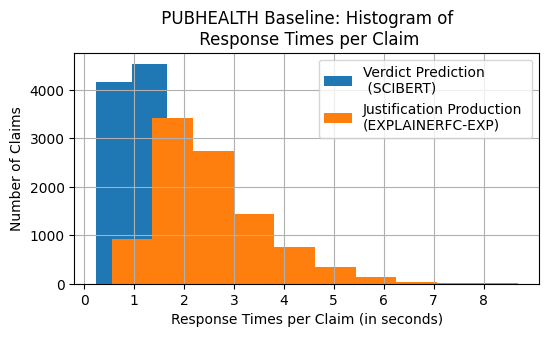

In [145]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3))
plt.hist(train['mtc_3'], bins=10, label='Verdict Prediction\n (SCIBERT)')
plt.hist(train['mtc_3_just'], bins=10, label='Justification Production \n(EXPLAINERFC-EXP)')
plt.xlabel('Response Times per Claim (in seconds)')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.ylabel('Number of Claims')
plt.grid(True)
plt.legend()

plt.title(' PUBHEALTH Baseline: Histogram of \n Response Times per Claim')

Text(0.5, 1.0, 'PUBHEALTH Baseline: Histogram of \n Response Times per Claim')

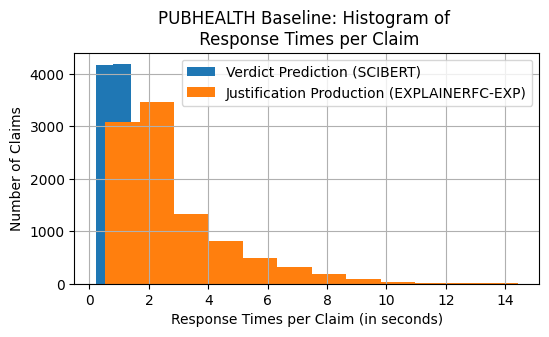

In [141]:
print(train['mtc'].describe())
print(train['mtc_just'].describe())

count    9832.000000
mean        0.725819
std         0.515363
min         0.002000
25%         0.388000
50%         0.620000
75%         0.930000
max         7.083000
Name: mtc, dtype: float64
count    9832.000000
mean        1.754939
std         1.034827
min         0.217000
25%         1.004750
50%         1.435000
75%         2.264000
max         7.815000
Name: mtc_just, dtype: float64


In [142]:
print(train['mtc_base'].describe())
print(train['mtc_base_just'].describe())

count    9832.000000
mean        0.975569
std         0.515964
min         0.204000
25%         0.639000
50%         0.869000
75%         1.180000
max         7.291000
Name: mtc_base, dtype: float64
count    9832.000000
mean        2.834136
std         1.867960
min         0.537000
25%         1.595000
50%         2.101000
75%         3.523250
max        14.438000
Name: mtc_base_just, dtype: float64


In [143]:
print(train['mtc_3'].describe())
print(train['mtc_3_just'].describe())

count    9832.000000
mean        1.125006
std         0.535416
min         0.228000
25%         0.776000
50%         1.029000
75%         1.353000
max         7.435000
Name: mtc_3, dtype: float64
count    9832.000000
mean        2.556106
std         1.106796
min         0.552000
25%         1.759000
50%         2.318000
75%         3.119250
max         8.696000
Name: mtc_3_just, dtype: float64


array([[<Axes: title={'center': 'mtc_just'}>]], dtype=object)

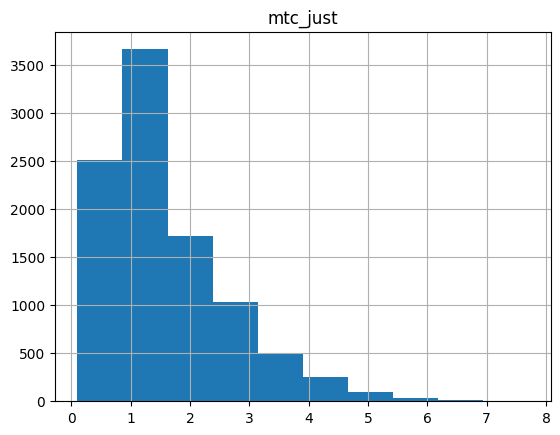

In [43]:
train.hist(column='mtc_just')